In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('./ratings.dat', names=['user', 'movie', 'rating', 'date'], delimiter='::', engine= 'python')
print('Rows:', df.shape[0], '; Columns:', df.shape[1], '\n')

Rows: 1000209 ; Columns: 4 



In [27]:
from datetime import datetime
#df.date = pd.to_datetime(df.date)
df = df[['movie', 'user', 'rating', 'date']]
print(df.head(5))

   movie  user  rating       date
0   1193     1       5  978300760
1    661     1       3  978302109
2    914     1       3  978301968
3   3408     1       4  978300275
4   2355     1       5  978824291


In [28]:
df.to_csv("data1m.csv", index = False)

In [29]:
data = pd.read_csv('data1m.csv')

In [13]:
# it returns True for a row that has atleast one Nan value.
null_bool = df.isnull().any(axis = 1)

# Removing those duplicates ( if any)
df.drop(df[null_bool].index, inplace=True)
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


In [14]:
dup_bool = df.duplicated(['movie','user','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


In [15]:
print("Total data ")
print("-"*50)
print("\nTotal No of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.user)))
print("Total No of movies  :", len(np.unique(df.movie)))

Total data 
--------------------------------------------------

Total No of ratings : 1000209
Total No of Users   : 6040
Total No of movies  : 3706


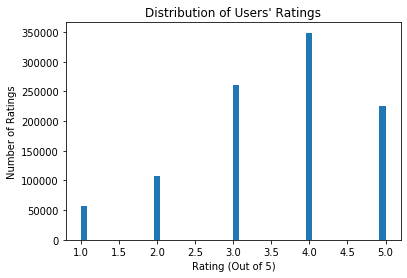

In [20]:
df.rating.plot.hist(bins=50)
plt.title("Distribution of Users' Ratings")
plt.ylabel('Number of Ratings')
plt.xlabel('Rating (Out of 5)')

In [23]:
ratings_movie_summary = df.groupby('movie')['rating'].agg(['count', 'mean', 'std'])
ratings_movie_summary.head(10)

,count,mean,std
movie,,,
1,2077,4.146846,0.852349
2,701,3.201141,0.983172
3,478,3.016736,1.071712
4,170,2.729412,1.013381
5,296,3.006757,1.025086
6,940,3.878723,0.934588
7,458,3.410480,0.979918
8,68,3.014706,0.954059
9,102,2.656863,1.048290


In [24]:
ratings_user_summary = df.groupby('user')['rating'].agg(['count', 'mean', 'std'])
ratings_user_summary.head(10)

,count,mean,std
user,,,
1,53,4.188679,0.680967
2,129,3.713178,1.001513
3,51,3.901961,0.984985
4,21,4.190476,1.077917
5,198,3.146465,1.132699
6,71,3.901408,0.830747
7,31,4.322581,0.747757
8,139,3.884892,0.925321
9,106,3.735849,0.820010
